<a href="https://colab.research.google.com/github/yenjia/Homework-of-Quantum2021/blob/main/HW3/tensorflow_QNN0609.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More QNN Layer

In [ ]:
!pip install tensorflow==2.4.1
!pip install tensorflow-quantum 

     |████████████████████████████████| 394.3MB 45kB/s 
     |████████████████████████████████| 471kB 30.1MB/s 
     |████████████████████████████████| 2.9MB 26.0MB/s 
     |████████████████████████████████| 3.8MB 27.8MB/s 
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 7.8MB 3.6MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |█████████████████████

In [ ]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [ ]:
import pandas as pd

In [ ]:
tf.random.set_seed(0)

## Nature Dataset

In [ ]:
df_ori = pd.read_csv("Direct_Kernel_Set_II_Classifications.csv")
# df_ori = pd.read_csv("Direct_Kernel_Set_III_Training.csv")
df_ori = df_ori.values
df_ori[:5]

array([[0.        , 5.34070751, 4.20973416, 1.        , 2.1733763 ],
       [1.        , 0.25132741, 0.43982297, 1.        , 1.03404742],
       [2.        , 1.0681415 , 1.63362818, 1.        , 1.83327043],
       [3.        , 1.44513262, 4.90088454, 1.        , 2.63771939],
       [4.        , 5.90619419, 0.18849556, 1.        , 2.0147052 ]])

In [ ]:
data = df_ori[:,[1,2]]
data_label = df_ori[:,3]
data_label = (data_label == 1).astype(np.int)
print(data[:10])
print(data_label[:10])

[[5.34070751 4.20973416]
 [0.25132741 0.43982297]
 [1.0681415  1.63362818]
 [1.44513262 4.90088454]
 [5.90619419 0.18849556]
 [3.39292007 0.25132741]
 [5.15221195 4.71238898]
 [4.71238898 4.83805269]
 [5.96902604 3.70707933]
 [5.02654825 4.96371639]]
[1 1 1 1 1 1 1 1 1 1]


## Paper Dataset

In [ ]:
df_ori = pd.read_excel("quantum_data_0609.xlsx")
df_ori = df_ori.values
df_ori[:5]

FileNotFoundError: ignored

In [ ]:
data = df_ori[:,[0,1]]
data_label = df_ori[:,2]
print(data[:5])
print(data_label[:5])

## Other Data

In [ ]:
# filename = "input_spiral.txt"
filename = "input_spiral.txt"
f=open(filename,"r")
lines=f.readlines()
result=[]
for x in lines:
    result.append(x.split('\t'))
f.close()

data = np.zeros((200,2))
data_label = np.zeros((200))
for i in range(200):
  data[i,0] = float(result[i+1][1])
  data[i,1] = float(result[i+1][2])
  data_label[i] = int((result[i+1][8]).replace('\n',""))
data_label = (data_label==1).astype(np.int)
print(data[:5])
print(data_label[:5])

[[ 1.53765443 -3.60292843]
 [ 0.58596151 -0.280281  ]
 [-0.25330696 -0.38548696]
 [-0.76327072  0.2826243 ]
 [ 0.47342952 -2.543543  ]]
[1 1 0 0 0]


## Dataset distribution

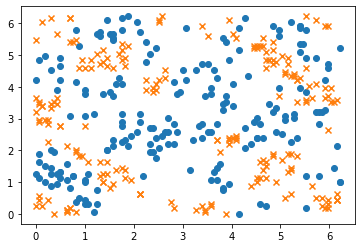

In [ ]:
plt.scatter(data[data_label==0,0],data[data_label==0,1], marker='o')
plt.scatter(data[data_label==1,0],data[data_label==1,1], marker='x')

In [ ]:
input_data = (data[:,0]**2+data[:,1]**2)
input_data = input_data.flatten()
label = data_label.flatten()

idx = np.random.permutation(len(label))
input_data,label = input_data[idx], label[idx]

q0, q1 = cirq.GridQubit.rect(1, 2)
q_data =[cirq.Circuit(
        cirq.ry(i)(q0),
        cirq.ry(i)(q1)) for i in input_data] 
print(q_data[:5])
q_data = tfq.convert_to_tensor(q_data)

n = label.shape[0]//5*4
n1 = label.shape[0]//10*9
print(n)

x_train = q_data[:n]
y_train = label[:n]
x_val = q_data[n:n1]
y_val = label[n:n1]
x_test = q_data[n1:]
y_test = label[n1:]

[cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=0.006598461919992754).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=0.006598461919992754).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=9.533525453348142).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=9.533525453348142).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=10.25705381914498).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=10.25705381914498).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=0.6294073200626558).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=0.6294073200626558).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=0.21276461127386506).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=0.21276461127386506).on(cirq.GridQubit(0, 1)),
    ),
])]
160


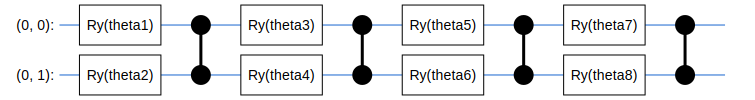

In [ ]:
theta1 = sympy.Symbol('theta1')
theta2 = sympy.Symbol('theta2')
theta3 = sympy.Symbol('theta3')
theta4 = sympy.Symbol('theta4')
theta5 = sympy.Symbol('theta5')
theta6 = sympy.Symbol('theta6')
theta7 = sympy.Symbol('theta7')
theta8 = sympy.Symbol('theta8')
circuit = cirq.Circuit(
    cirq.ry(theta1).on(q0),
    cirq.ry(theta2).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta3).on(q0),
    cirq.ry(theta4).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta5).on(q0),
    cirq.ry(theta6).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta7).on(q0),
    cirq.ry(theta8).on(q1), cirq.CZ(q0, q1))
SVGCircuit(circuit)

In [ ]:
# 建立量子層和經典全連接層
q_layer = tfq.layers.PQC(circuit, [cirq.Z(q0), cirq.Z(q1)])
dense_layer = tf.keras.layers.Dense(1, activation="sigmoid")
# 使用Keras建立訓練流程。量子資料首先通過PQC，然後通過經典的全連接模型
q_data_input = tf.keras.Input(shape=() ,dtype=tf.dtypes.string)
expectation_output = q_layer(q_data_input)
classifier_output = dense_layer(expectation_output)

model = tf.keras.Model(inputs=q_data_input, outputs=classifier_output)
print(model.summary())
# 編譯模型，指定優化器、損失函數和評估指標，並進行訓練
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=['accuracy','AUC']
)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
pqc_2 (PQC)                  (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x=x_train, y=y_train, epochs=100,validation_data=(x_val,y_val))

# 輸出量子層參數（即theta）的訓練結果
print(q_layer.get_weights())

Epoch 1/100
5/5 [==============================] - 1s 85ms/step - loss: 0.2656 - accuracy: 0.4385 - auc: 0.4185 - val_loss: 0.2786 - val_accuracy: 0.4000 - val_auc: 0.3250
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 0.2632 - accuracy: 0.4655 - auc: 0.4404 - val_loss: 0.2782 - val_accuracy: 0.4000 - val_auc: 0.3300
Epoch 3/100
5/5 [==============================] - 0s 28ms/step - loss: 0.2634 - accuracy: 0.4563 - auc: 0.4447 - val_loss: 0.2778 - val_accuracy: 0.4000 - val_auc: 0.3450
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.2649 - accuracy: 0.4511 - auc: 0.4311 - val_loss: 0.2774 - val_accuracy: 0.4000 - val_auc: 0.3500
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 0.2668 - accuracy: 0.4228 - auc: 0.3873 - val_loss: 0.2770 - val_accuracy: 0.4000 - val_auc: 0.3500
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.2606 - accuracy: 0.4662 - auc: 0.4443 - val_loss: 0.2766 - val_acc

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc, test AUC:", results)

Evaluate on test data
1/1 [==============================] - 0s 20ms/step - loss: 0.2541 - accuracy: 0.3500 - auc: 0.5655
test loss, test acc, test AUC: [0.2541077136993408, 0.3499999940395355, 0.5654762387275696]


In [ ]:
grid = 30
x_cor = -5
y_cor = 5
x_axis = np.linspace(x_cor,y_cor,grid)
y_axis = np.linspace(x_cor,y_cor,grid)
tmp = np.zeros((grid**2,3))
count = 0
for i in x_axis:
  for j in y_axis:
    z = (i**2+j**2)
    label_z = int(model.predict(tfq.convert_to_tensor([cirq.Circuit(cirq.ry(z)(q0),cirq.ry(z)(q1))])) > 0.5)
    tmp[count,:] = np.array([i,j,label_z])
    count += 1
    if count % 100 == 0:
      print(count)

100
200
300
400
500
600
700
800
900


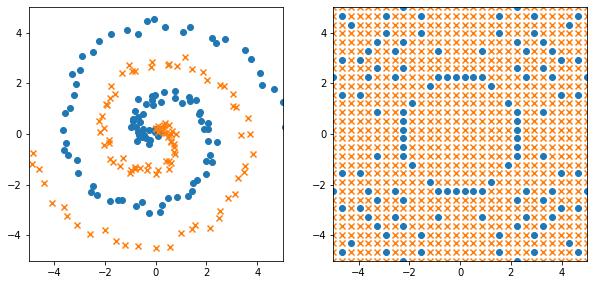

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(data[data_label==0,0],data[data_label==0,1], marker='o')
plt.scatter(data[data_label==1,0],data[data_label==1,1], marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(x_cor, y_cor)
plt.ylim(x_cor, y_cor)
plt.subplot(122)
plt.scatter(tmp[tmp[:,2]==0,0],tmp[tmp[:,2]==0,1], marker='o')
plt.scatter(tmp[tmp[:,2]==1,0],tmp[tmp[:,2]==1,1], marker='x')
plt.xlim(x_cor, y_cor)
plt.ylim(x_cor, y_cor)
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(np.int)
# print(y_pred)
tf.math.confusion_matrix(y_pred,y_test)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 3,  2],
       [11,  4]], dtype=int32)>

# 分開

In [ ]:
tf.random.set_seed(0)

In [ ]:
df_ori = pd.read_excel("quantum_data_0609.xlsx")
df_ori = df_ori.values
df_ori[:5]

array([[3.4980695 , 0.76083467, 0.        ],
       [2.37451737, 0.77046549, 0.        ],
       [2.04440154, 0.78009631, 0.        ],
       [3.63127413, 0.78009631, 0.        ],
       [3.77027027, 0.78009631, 0.        ]])

In [ ]:
data = df_ori[:,[0,1]]
data_label = df_ori[:,2]
print(data[:5])
print(data_label[:5])

[[3.4980695  0.76083467]
 [2.37451737 0.77046549]
 [2.04440154 0.78009631]
 [3.63127413 0.78009631]
 [3.77027027 0.78009631]]
[0. 0. 0. 0. 0.]


In [ ]:
# filename = "input_spiral.txt"
filename = "input_circle.txt"
f=open(filename,"r")
lines=f.readlines()
result=[]
for x in lines:
    result.append(x.split('\t'))
f.close()

data = np.zeros((200,2))
data_label = np.zeros((200))
for i in range(200):
  data[i,0] = float(result[i+1][1])
  data[i,1] = float(result[i+1][2])
  data_label[i] = int((result[i+1][8]).replace('\n',""))
data_label = (data_label==1).astype(np.int)
print(data[:5])
print(data_label[:5])

[[ 4.39817517  0.50672631]
 [ 0.35736117  0.5471098 ]
 [ 1.4188799  -0.96954257]
 [ 0.85898972 -4.19314655]
 [-0.25158604  4.57988368]]
[0 1 1 0 0]


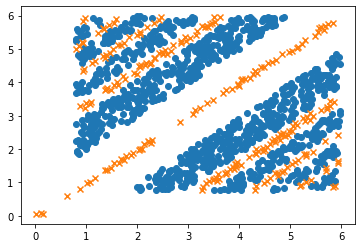

In [ ]:
plt.scatter(data[data_label==0,0],data[data_label==0,1], marker='o')
plt.scatter(data[data_label==1,0],data[data_label==1,1], marker='x')

In [ ]:
# input_data = (data[:,0]**2+data[:,1]**2)
# input_data = input_data.flatten()
input_data = data
label = data_label.flatten()

idx = np.random.permutation(len(label))
input_data,label = input_data[idx], label[idx]

q0, q1 = cirq.GridQubit.rect(1, 2)
q_data =[cirq.Circuit(
        cirq.ry(i[0])(q0),
        cirq.ry(i[1])(q1)) for i in input_data] 
print(q_data[:5])
q_data = tfq.convert_to_tensor(q_data)

n = label.shape[0]//5*4
n1 = label.shape[0]//10*9
print(n)

x_train = q_data[:n]
y_train = label[:n]
x_val = q_data[n:n1]
y_val = label[n:n1]
x_test = q_data[n1:]
y_test = label[n1:]

[cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=3.8327430369999997).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=0.81681409).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=2.513274123).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=6.0946897479999995).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=4.523893421).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=5.277875658).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=2.45044227).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=5.215043805).on(cirq.GridQubit(0, 1)),
    ),
]), cirq.Circuit([
    cirq.Moment(
        cirq.Ry(rads=0.125663706).on(cirq.GridQubit(0, 0)),
        cirq.Ry(rads=3.3929200660000003).on(cirq.GridQubit(0, 1)),
    ),
])]
320


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


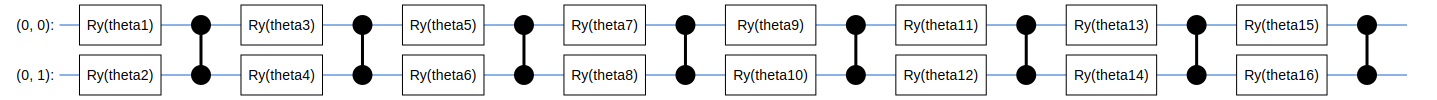

In [ ]:
theta1 = sympy.Symbol('theta1')
theta2 = sympy.Symbol('theta2')
theta3 = sympy.Symbol('theta3')
theta4 = sympy.Symbol('theta4')
theta5 = sympy.Symbol('theta5')
theta6 = sympy.Symbol('theta6')
theta7 = sympy.Symbol('theta7')
theta8 = sympy.Symbol('theta8')
theta9 = sympy.Symbol('theta9')
theta10 = sympy.Symbol('theta10')
theta11 = sympy.Symbol('theta11')
theta12 = sympy.Symbol('theta12')
theta13 = sympy.Symbol('theta13')
theta14 = sympy.Symbol('theta14')
theta15 = sympy.Symbol('theta15')
theta16 = sympy.Symbol('theta16')
circuit = cirq.Circuit(
    cirq.ry(theta1).on(q0),
    cirq.ry(theta2).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta3).on(q0),
    cirq.ry(theta4).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta5).on(q0),
    cirq.ry(theta6).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta7).on(q0),
    cirq.ry(theta8).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta9).on(q0),
    cirq.ry(theta10).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta11).on(q0),
    cirq.ry(theta12).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta13).on(q0),
    cirq.ry(theta14).on(q1), cirq.CZ(q0, q1),
    cirq.ry(theta15).on(q0),
    cirq.ry(theta16).on(q1), cirq.CZ(q0, q1))
SVGCircuit(circuit)

In [ ]:
# 建立量子層和經典全連接層
q_layer = tfq.layers.PQC(circuit, [cirq.Z(q0), cirq.Z(q1)])
dense_layer = tf.keras.layers.Dense(1, activation="sigmoid")
# 使用Keras建立訓練流程。量子資料首先通過PQC，然後通過經典的全連接模型
q_data_input = tf.keras.Input(shape=() ,dtype=tf.dtypes.string)
expectation_output = q_layer(q_data_input)
classifier_output = dense_layer(expectation_output)

model = tf.keras.Model(inputs=q_data_input, outputs=classifier_output)
print(model.summary())
# 編譯模型，指定優化器、損失函數和評估指標，並進行訓練
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics=['accuracy','AUC']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
pqc (PQC)                    (None, 2)                 16        
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x=x_train, y=y_train, epochs=500,validation_data=(x_val,y_val))

# 輸出量子層參數（即theta）的訓練結果
print(q_layer.get_weights())

Epoch 1/500
10/10 [==============================] - 4s 111ms/step - loss: 0.2522 - accuracy: 0.5542 - auc: 0.5507 - val_loss: 0.2343 - val_accuracy: 0.6250 - val_auc: 0.6279
Epoch 2/500
10/10 [==============================] - 0s 36ms/step - loss: 0.2500 - accuracy: 0.5651 - auc: 0.5771 - val_loss: 0.2340 - val_accuracy: 0.6250 - val_auc: 0.6330
Epoch 3/500
10/10 [==============================] - 0s 37ms/step - loss: 0.2539 - accuracy: 0.5632 - auc: 0.5481 - val_loss: 0.2338 - val_accuracy: 0.6250 - val_auc: 0.6381
Epoch 4/500
10/10 [==============================] - 0s 36ms/step - loss: 0.2529 - accuracy: 0.5432 - auc: 0.5452 - val_loss: 0.2336 - val_accuracy: 0.6500 - val_auc: 0.6394
Epoch 5/500
10/10 [==============================] - 0s 36ms/step - loss: 0.2438 - accuracy: 0.5920 - auc: 0.5936 - val_loss: 0.2333 - val_accuracy: 0.6500 - val_auc: 0.6432
Epoch 6/500
10/10 [==============================] - 0s 39ms/step - loss: 0.2432 - accuracy: 0.5856 - auc: 0.6015 - val_loss: 0.2

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc, test AUC:", results)

Evaluate on test data
2/2 [==============================] - 0s 13ms/step - loss: 0.2457 - accuracy: 0.6250 - auc: 0.5800
test loss, test acc, test AUC: [0.24572376906871796, 0.625, 0.5800000429153442]


In [ ]:
grid = 30
x_cor = 0
y_cor = 6
x_axis = np.linspace(x_cor,y_cor,grid)
y_axis = np.linspace(x_cor,y_cor,grid)
tmp = np.zeros((grid**2,3))
count = 0
for i in x_axis:
  for j in y_axis:
    # z = (i**2+j**2)
    label_z = int(model.predict(tfq.convert_to_tensor([cirq.Circuit(cirq.ry(i)(q0),cirq.ry(j)(q1))])) > 0.5)
    tmp[count,:] = np.array([i,j,label_z])
    count += 1
    if count % 100 == 0:
      print(count)

100
200
300
400
500
600
700
800
900


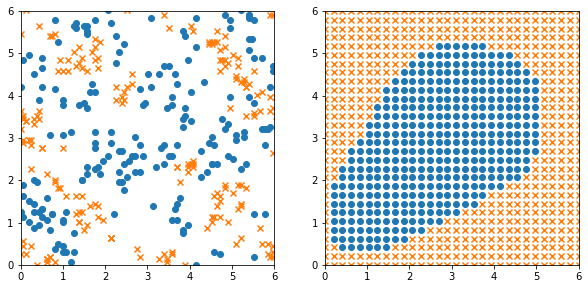

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(data[data_label==0,0],data[data_label==0,1], marker='o')
plt.scatter(data[data_label==1,0],data[data_label==1,1], marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(x_cor, y_cor)
plt.ylim(x_cor, y_cor)
plt.subplot(122)
plt.scatter(tmp[tmp[:,2]==0,0],tmp[tmp[:,2]==0,1], marker='o')
plt.scatter(tmp[tmp[:,2]==1,0],tmp[tmp[:,2]==1,1], marker='x')
plt.xlim(x_cor, y_cor)
plt.ylim(x_cor, y_cor)
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(np.int)
# print(y_pred)
tf.math.confusion_matrix(y_pred,y_test)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13,  8],
       [ 7, 12]], dtype=int32)>